In [1]:
!git clone https://github.com/abhishict/TextMiningProject.git

Cloning into 'TextMiningProject'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 27 (delta 8), reused 13 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (27/27), 5.02 MiB | 5.32 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler

In [3]:
df_reviews = pd.read_csv('/content/TextMiningProject/data/cleaned_dataset.csv')

In [4]:
df_reviews.head()

,Label,Description,Cleaned_Description,Article_Length
0,Environmental Concern,Brake pad dust can be more toxic than exhaust ...,brake pad dust toxic exhaust emission study say,8
1,Environmental Benefit,EVs and datacentres driving new global ‘age of...,datacentres driving global age electricity say...,7
2,Economic Challenge,EV drivers spend extra £85m on VAT when using ...,driver spend extra vat using public charger,7
3,Economic Challenge,UK used electric vehicle sales hit record last...,uk used sale hit record last price fell,8
4,Environmental Benefit,Promoting green growth does not make you an ‘e...,promoting green growth econutter way forward,6


In [5]:
df_reviews = df_reviews.dropna(subset=['Cleaned_Description'])

In [6]:
df_reviews['Label'].value_counts()

,count
Label,
Pro-EV,1297
Against-EV,911
Environmental Benefit,732
General Pro,720
General Against,410
Economic Challenge,397
Economic Advantage,394
Environmental Concern,309


In [7]:
df_reviews['Label'].unique()

array(['Environmental Concern', 'Environmental Benefit',
       'Economic Challenge', 'Economic Advantage', 'Pro-EV', 'Against-EV',
       'General Pro', 'General Against'], dtype=object)

In [8]:
positive_labels = ["Pro-EV", "General Pro", "Environmental Benefit", "Economic Advantage"]
df_reviews["Sentiment"] = df_reviews["Label"].apply(lambda x: "positive" if x in positive_labels else "negative")

<ipython-input-8-d09cd8f496ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews["Sentiment"] = df_reviews["Label"].apply(lambda x: "positive" if x in positive_labels else "negative")


In [9]:
df_reviews['Sentiment'].value_counts()

,count
Sentiment,
positive,3143
negative,2027


In [10]:
def get_label_type(label):
    if label in ["Environmental Concern", "Environmental Benefit"]:
        return "Environmental"
    elif label in ["Economic Challenge", "Economic Advantage"]:
        return "Economic"
    else:
        return "General"

In [24]:
df_reviews_filtered = df_reviews[df_reviews['Label'].isin([
     'Environmental Concern', 'Environmental Benefit',
    'Economic Challenge', 'Economic Advantage', 'Against-EV', 'Pro-EV'
])]

df_reviews_filtered['ReviewType'] = df_reviews_filtered['Label'].apply(get_label_type)

<ipython-input-24-abc5432d8e00>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews_filtered['ReviewType'] = df_reviews_filtered['Label'].apply(get_label_type)


In [26]:
# !pip install sentence-transformers

In [18]:
# Imports
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt

# Assume df_reviews is your dataframe
# Columns: ['Label', 'Description', 'Cleaned_Description', 'Article_Length']

# Step 1: Embed the Cleaned_Description using a BERT model

<Figure size 800x600 with 0 Axes>

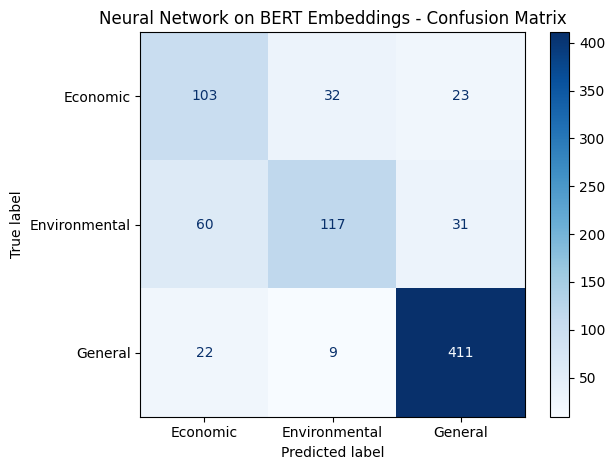

In [27]:
bert_model = SentenceTransformer('all-MiniLM-L6-v2')
X_embeddings = bert_model.encode(df_reviews_filtered['Cleaned_Description'].tolist())

# Step 2: Prepare Labels
y = df_reviews_filtered['ReviewType']

# Step 3: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_embeddings, y, test_size=0.2, stratify=y, random_state=42)

In [45]:
X_train

array([[-0.04875924,  0.07298919,  0.08180302, ..., -0.07206835,
         0.03430853, -0.04895104],
       [-0.10744665,  0.01894492, -0.04790125, ..., -0.01408048,
         0.0756663 ,  0.03329572],
       [-0.0627204 ,  0.02728662, -0.02857834, ...,  0.03356358,
        -0.0315391 , -0.01468013],
       ...,
       [-0.02851024,  0.11510767,  0.05586576, ...,  0.0023888 ,
         0.00625858,  0.07150202],
       [-0.10744665,  0.01894484, -0.04790127, ..., -0.01408053,
         0.0756663 ,  0.0332957 ],
       [-0.08795184, -0.06987109, -0.04162896, ...,  0.07390135,
         0.00379068, -0.00517323]], dtype=float32)

In [46]:
X_test

array([[-0.07108074, -0.00290141,  0.02833667, ..., -0.12508996,
        -0.01763074,  0.06721452],
       [-0.10425671, -0.00600494,  0.0005335 , ..., -0.00501021,
         0.07799025,  0.02387036],
       [-0.00930587, -0.003225  , -0.03582724, ..., -0.03617761,
        -0.03232381, -0.01561061],
       ...,
       [-0.0649364 ,  0.02674864,  0.0980595 , ..., -0.0655888 ,
        -0.15332204, -0.00974985],
       [ 0.01514897, -0.07292034,  0.06815747, ...,  0.04296765,
        -0.0356439 ,  0.01201682],
       [-0.07455947, -0.05162561, -0.05961326, ..., -0.05820749,
         0.07714629,  0.00656415]], dtype=float32)

<Figure size 800x600 with 0 Axes>

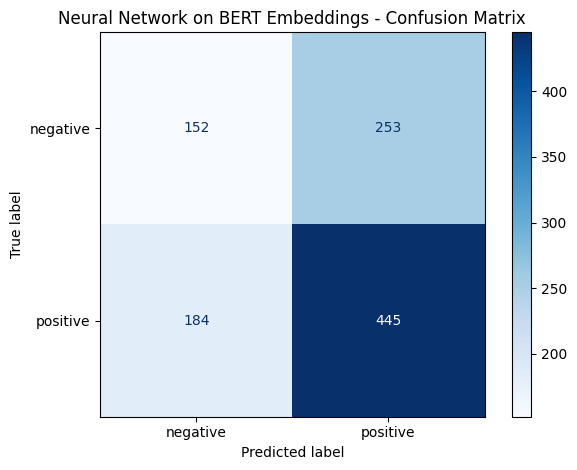

In [42]:
# Step 4: Neural Network Classifier
mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# Step 5: Predictions
y_pred = mlp_model.predict(X_test)

# Step 6: Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=mlp_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp_model.classes_)

plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Neural Network on BERT Embeddings - Confusion Matrix")
plt.tight_layout()
plt.show()


In [28]:
print("Classification Report:\n", classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {100*accuracy:.2f}%")

Classification Report:
                precision    recall  f1-score   support

     Economic       0.56      0.65      0.60       158
Environmental       0.74      0.56      0.64       208
      General       0.88      0.93      0.91       442

     accuracy                           0.78       808
    macro avg       0.73      0.71      0.72       808
 weighted avg       0.78      0.78      0.78       808

Accuracy: 78.09%



======== Results for Model with Hyperparameter-{'hidden_layer_sizes': (64, 32), 'activation': 'relu', 'max_iter': 500, 'solver': 'adam'} =========



<Figure size 800x600 with 0 Axes>

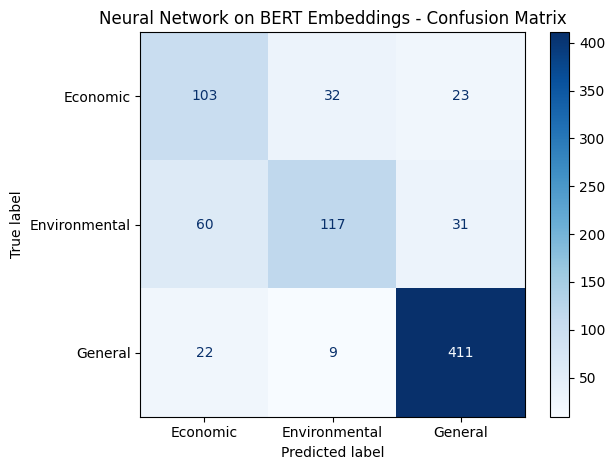

Classification Report:
                precision    recall  f1-score   support

     Economic       0.56      0.65      0.60       158
Environmental       0.74      0.56      0.64       208
      General       0.88      0.93      0.91       442

     accuracy                           0.78       808
    macro avg       0.73      0.71      0.72       808
 weighted avg       0.78      0.78      0.78       808

Accuracy: 78.09%

======== Results for Model with Hyperparameter-{'hidden_layer_sizes': (128, 64), 'activation': 'tanh', 'max_iter': 700, 'solver': 'adam'} =========



<Figure size 800x600 with 0 Axes>

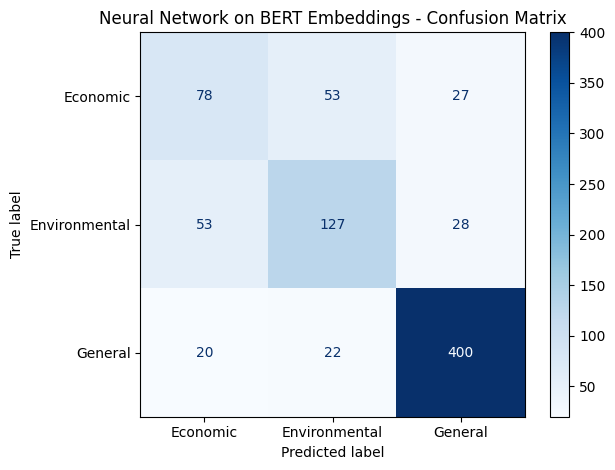

Classification Report:
                precision    recall  f1-score   support

     Economic       0.52      0.49      0.50       158
Environmental       0.63      0.61      0.62       208
      General       0.88      0.90      0.89       442

     accuracy                           0.75       808
    macro avg       0.67      0.67      0.67       808
 weighted avg       0.74      0.75      0.75       808

Accuracy: 74.88%

======== Results for Model with Hyperparameter-{'hidden_layer_sizes': (256, 128, 64), 'activation': 'relu', 'max_iter': 1000, 'solver': 'adam'} =========



<Figure size 800x600 with 0 Axes>

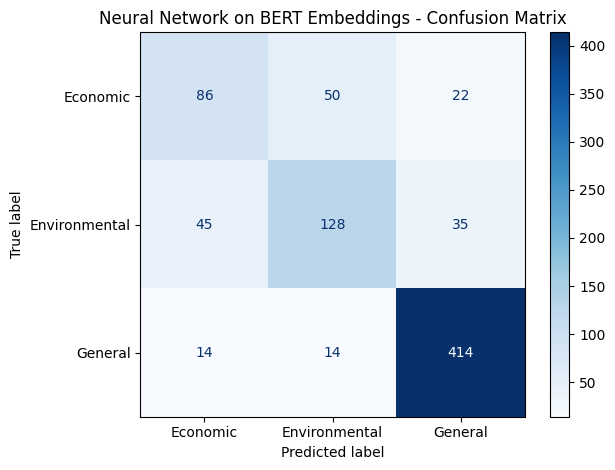

Classification Report:
                precision    recall  f1-score   support

     Economic       0.59      0.54      0.57       158
Environmental       0.67      0.62      0.64       208
      General       0.88      0.94      0.91       442

     accuracy                           0.78       808
    macro avg       0.71      0.70      0.70       808
 weighted avg       0.77      0.78      0.77       808

Accuracy: 77.72%

======== Results for Model with Hyperparameter-{'hidden_layer_sizes': (100,), 'activation': 'logistic', 'max_iter': 600, 'solver': 'adam'} =========



<Figure size 800x600 with 0 Axes>

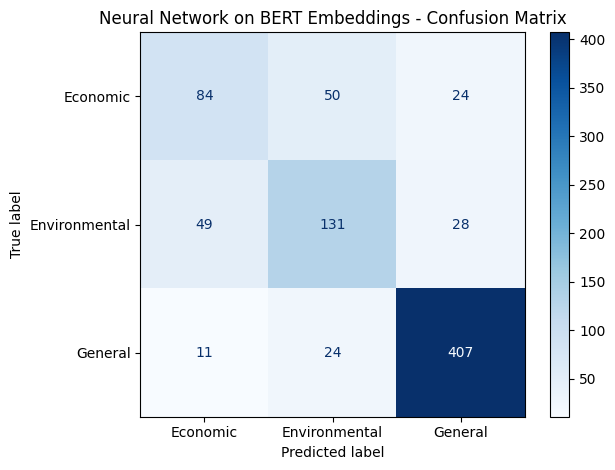

Classification Report:
                precision    recall  f1-score   support

     Economic       0.58      0.53      0.56       158
Environmental       0.64      0.63      0.63       208
      General       0.89      0.92      0.90       442

     accuracy                           0.77       808
    macro avg       0.70      0.69      0.70       808
 weighted avg       0.76      0.77      0.77       808

Accuracy: 76.98%

======== Results for Model with Hyperparameter-{'hidden_layer_sizes': (50, 30), 'activation': 'tanh', 'max_iter': 800, 'solver': 'adam'} =========



<Figure size 800x600 with 0 Axes>

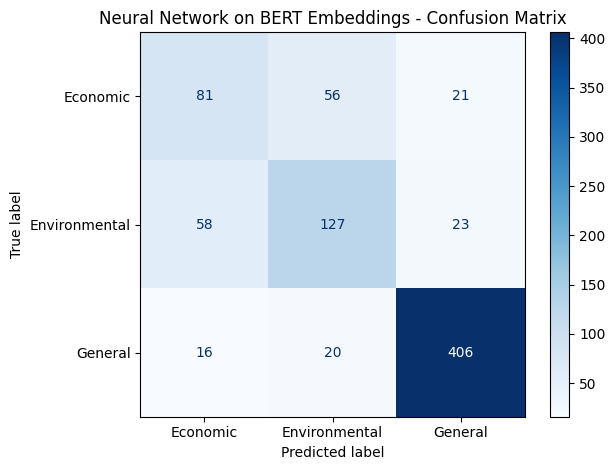

Classification Report:
                precision    recall  f1-score   support

     Economic       0.52      0.51      0.52       158
Environmental       0.63      0.61      0.62       208
      General       0.90      0.92      0.91       442

     accuracy                           0.76       808
    macro avg       0.68      0.68      0.68       808
 weighted avg       0.76      0.76      0.76       808

Accuracy: 75.99%


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


X_train, X_test, y_train, y_test = train_test_split(X_embeddings, y, test_size=0.2, stratify=y, random_state=42)

# Define list of different hyperparameter sets
param_grid = [
    {'hidden_layer_sizes': (64, 32), 'activation': 'relu', 'max_iter': 500, 'solver': 'adam'},
    {'hidden_layer_sizes': (128, 64), 'activation': 'tanh', 'max_iter': 700, 'solver': 'adam'},
    {'hidden_layer_sizes': (256, 128, 64), 'activation': 'relu', 'max_iter': 1000, 'solver': 'adam'},
    {'hidden_layer_sizes': (100,), 'activation': 'logistic', 'max_iter': 600, 'solver': 'adam'},
    {'hidden_layer_sizes': (50, 30), 'activation': 'tanh', 'max_iter': 800, 'solver': 'adam'},
]

# Store results
results = []

# Loop over each hyperparameter combination
for i, params in enumerate(param_grid, 1):
    # Initialize and train model
    model = MLPClassifier(
        hidden_layer_sizes=params['hidden_layer_sizes'],
        activation=params['activation'],
        max_iter=params['max_iter'],
        solver=params['solver'],
        random_state=42
    )
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

    print(f'\n======== Results for Model with Hyperparameter-{params} =========\n')
    plt.figure(figsize=(8, 6))
    disp.plot(cmap='Blues', values_format='d')
    plt.title("Neural Network on BERT Embeddings - Confusion Matrix")
    plt.tight_layout()
    plt.show()

    print("Classification Report:\n", classification_report(y_test, y_pred))

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {100*accuracy:.2f}%")


    # Calculate Metrics
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    # Save results
    results.append({
        'Model_No': i,
        'Hidden_Layers': params['hidden_layer_sizes'],
        'Activation': params['activation'],
        'Max_Iter': params['max_iter'],
        'Solver': params['solver'],
        'Accuracy': accuracy,
        'Precision': prec,
        'Recall': rec,
        'F1_Score': f1
    })

# Convert results to a DataFrame for display
df_results = pd.DataFrame(results)

In [47]:
df_results

,Model_No,Hidden_Layers,Activation,Max_Iter,Solver,Accuracy,Precision,Recall,F1_Score
0,1,"(64, 32)",relu,500,adam,0.780941,0.727045,0.714754,0.715404
1,2,"(128, 64)",tanh,700,adam,0.748762,0.674797,0.669742,0.672076
2,3,"(256, 128, 64)",relu,1000,adam,0.777228,0.712917,0.698780,0.704852
3,4,"(100,)",logistic,600,adam,0.769802,0.703023,0.694089,0.698038
4,5,"(50, 30)",tanh,800,adam,0.759901,0.683473,0.680596,0.681964
